# Modelling Infected Cohort

Those that are infected (compartment $I$), and those that have recovered (compartment $R$). 
Infected people recover at a rate $\gamma$ (*gamma*), is the reciprocal of mean infectious period. The differential equations describing this are:

\begin{align}
\frac{dI}{dt} & = -\gamma I \\
\frac{dR}{dt} & = \gamma I \\
\end{align}

In [40]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import math

In [6]:
from scipy.integrate import odeint

In [15]:
gamma=0.05
def du_dt(u,t):
    return([-u[0]*gamma,u[0]*gamma])

In [16]:
x=np.linspace(0,1000,999)
y0=[100000,0]
y=odeint(du_dt,y0,x)

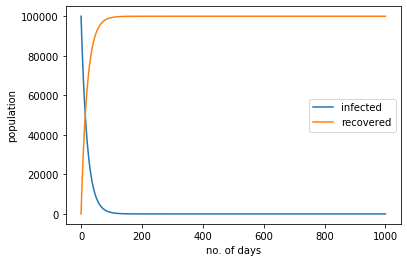

In [17]:
plt.plot(x,y[:,0],label="infected")
plt.plot(x,y[:,1],label="recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Simulating competing hazards

In this exercise, the focus is on adding disease-induced mortality to this model in order to explore the concept of competing hazards as introduced in the video. Using this model, you will also calculate the case fatality ratio, and compare it against the result using the formula approach that you have been introduced to.

The model we want to specify in this notebook has 3 compartments: $I$ (infected), $R$ (recovered) and $M$ (dead). 

The differential equations for the model look like this:
\begin{align}
\frac{dI}{dt} & = -\gamma I -\mu I \\
\frac{dR}{dt} & = \gamma I \\
\frac{dM}{dt} & = \mu I
\end{align}

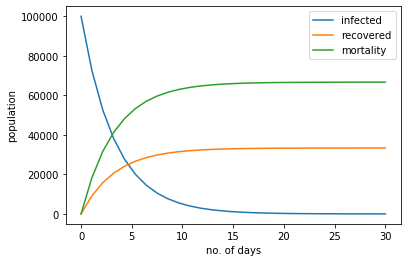

In [25]:
gamma=0.1
nu=0.2
def du_dt(u,t):
    return([-u[0]*(gamma+nu),u[0]*gamma,u[0]*nu])
x=np.linspace(0,30,29)
y0=[100000,0,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="infected")
plt.plot(x,y[:,1],label="recovered")
plt.plot(x,y[:,2],label="mortality")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# SIR Model with a Constant Force of Infection

In the last 2 etivities, you have learnt how you can represent differential equations in R through the use of the deSolve package. In this etivity you will use this skill to start coding a simplified SIR model within R. Let's recap first what an SIR model is: 

                     S-->I-->R

The differential equations for this system are:

\begin{align}
\frac{dS}{dt} & = -\lambda S \\
\frac{dI}{dt} & = \lambda S - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align}

We can use the SIR model to describe a disease that can be split into 3 states: susceptible ($S$), infected ($I$), or recovered (R). All those infected are infectious, and all those recovered are immune, so they cannot get the disease again.

One part of this model should already be very familiar to you! The transition from I to R is what we explored in etivity 1. The new addition is the susceptibles in compartment S. As you learnt in the lecture, depending on how many people in the population are infectious, susceptible people experience a force of infection $\lambda$ (*lambda*), which is the transition rate at which they become infected.


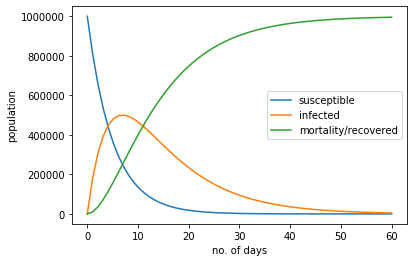

In [27]:
lamda=0.2
nu=0.1
def du_dt(u,t):
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(0,60,59)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="mortality/recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# SIR Model with a Dynamic Force of Infection

Now we define $\lambda$ as a function of the infection rate, $\beta$ (*beta*), and the proportion of the population that is infectious, $I/N$. 

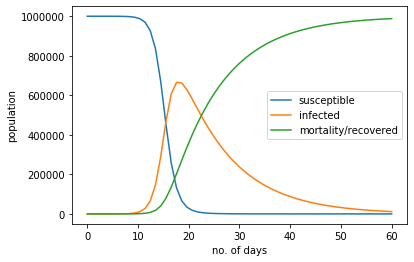

In [29]:
betta=1 # Daily infection rate
nu=0.1
def du_dt(u,t):
    lamda=betta*u[1]/1000000
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(0,60,59)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="mortality/recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# SIR dynamics with varying parameters

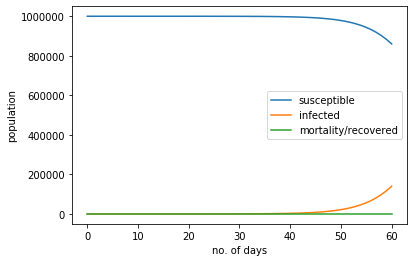

In [37]:
betta=0.2 # Daily infection rate
nu=0.0000000000001
def du_dt(u,t):
    lamda=betta*u[1]/1000000
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(0,60,59)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="mortality/recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Simulating the effective reproduction number R<sub>eff</sub>

the expression for the basic reproduction number R<sub>0</sub> in the simple SIR model: we get an epidemic only if $\beta$/$\gamma$ > 1, i.e. if the average number of secondary cases caused by a single infected case in a totally susceptible population is greater than 1. As susceptibility declines over the course of the epidemic, the effective reproduction number R<sub>eff</sub> determines the shape of the epidemic curve as it reflects the amount of immunity in the population at any given time.

Remember that in a simple homogenous SIR model, R<sub>eff</sub> is directly related to the proportion of the population that is susceptible:
\begin{align}
R_{eff} = R_{0} \frac{S}{N}
\end{align}

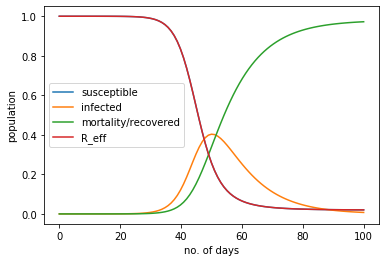

In [68]:
betta=0.4 # Daily infection rate
nu=0.1
r0=betta/nu
pop=1000000
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(0,100,99)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="mortality/recovered")
plt.plot(x,y[:,0]/pop,label="R_eff")

plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

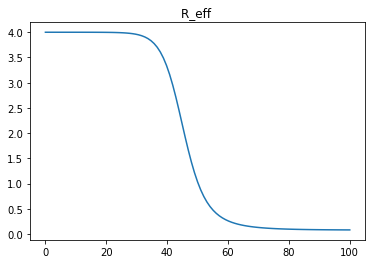

In [73]:
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

# Modelling population turnover

In our previous SIR model, we have assumed a closed population, i.e. one where no one dies and no babies are born. In terms of the epidemic dynamics, that has meant that as more and more people become infected and recovered, the pool of susceptibles continually decreases, and thus so too does the effective reproduction number. This is fine for diseases with short infectious periods, that spread through a population more quickly than the population is able to renew itself. But what about longer timescales?

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


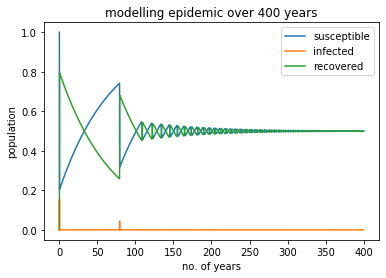

In [108]:
betta=0.4*365 # Daily infection rate
nu=0.2*365
mu=1/(70)
r0=betta/nu
b=1/(70)
pop=1000000
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda)-u[0]*mu+b*pop,u[0]*lamda-nu*u[1]-u[1]*mu,u[1]*nu-u[2]*mu])
x=np.linspace(0,400,400*365)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.title("modelling epidemic over 400 years")
plt.xlabel("no. of years")
plt.ylabel("population")
plt.legend()
plt.show()

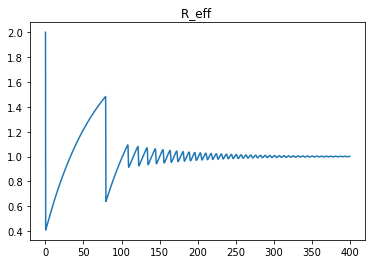

In [109]:
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

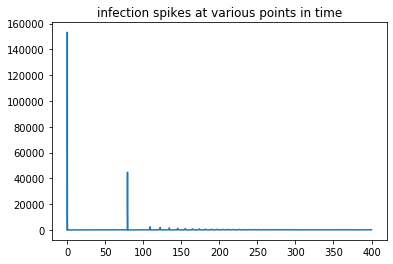

In [102]:
plt.title("infection spikes at various points in time")
plt.plot(x,y[:,1])
plt.show()

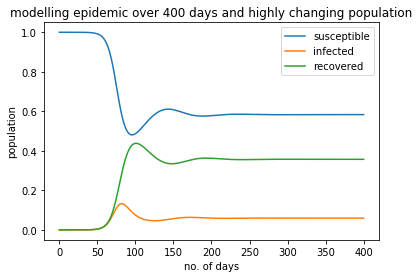

In [110]:
betta=0.4 # Daily infection rate
nu=0.2
mu=1/(30)
r0=betta/nu
b=1/(30)
pop=1000000
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda)-u[0]*mu+b*pop,u[0]*lamda-nu*u[1]-u[1]*mu,u[1]*nu-u[2]*mu])
x=np.linspace(0,400,400)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.title("modelling epidemic over 400 days and highly changing population")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

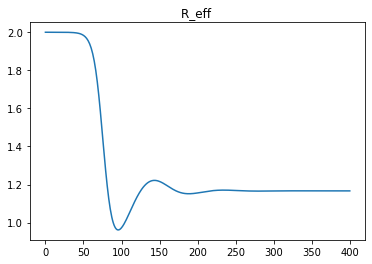

In [106]:
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

# A simple model for vaccination

By changing the initial conditions, we can prepare the population so that it has received a certain coverage of vaccination. Even though this is very simplistic, it will allow us to study some important effects of vaccination on the infection dynamics.

We are starting with the transmission and recovery parameters *beta* = 0.4 days$^{-1}$ and *gamma* = 0.1 days $^{-1}$. To incorporate immunity from vaccination in the model, we assume that a proportion *p* of the total population starts in the recovered compartment, representing the vaccine coverage and assuming the vaccine is perfectly effective. Again, we assume the epidemic starts with a single infected case introduced into the population.

Model this scenario for a duration of 2 years, assuming that the vaccine coverage is 50%, and plot the prevalence in each compartment over time. Confirm that you observe an epidemic peaking at around 125 days after introduction of the infectious person in the population. Also have a look at the proportion susceptible and recovered, to double-check this looks like what you would expect given your initial conditions.

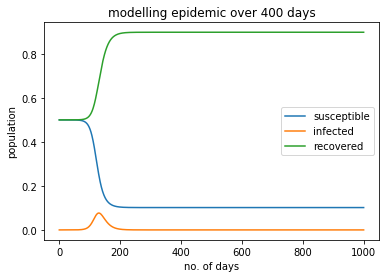

In [115]:
betta=0.4 # Daily infection rate
nu=0.1
r0=betta/nu
pop=1000000
p=0.5
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda),u[0]*lamda-nu*u[1],u[1]*nu])
x=np.linspace(0,1000,999)
y0=[999999*(1-p),1,p*(999999)]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.title("modelling epidemic over 400 days")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

In [113]:
np.argmax(y[:,1])

130

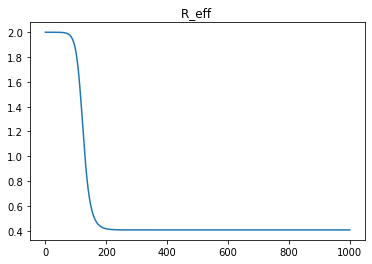

In [114]:
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

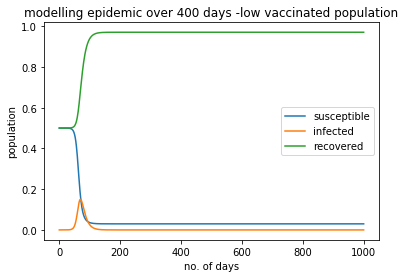

In [128]:
betta=0.6 # Daily infection rate
nu=0.1
r0=betta/nu
pop=1000000
p=0.5
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda),u[0]*lamda-nu*u[1],u[1]*nu])
x=np.linspace(0,1000,999)
y0=[999999*(1-p),1,p*(999999)]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.title("modelling epidemic over 400 days -low vaccinated population")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

In [129]:
np.argmax(y[:,1])

69

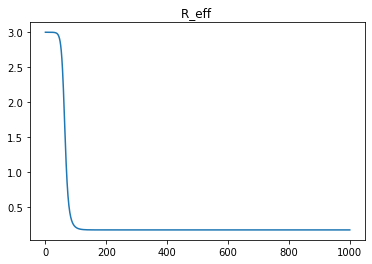

In [123]:
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

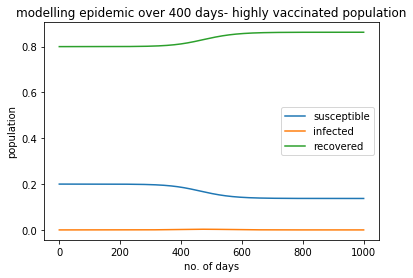

In [127]:
betta=0.6 # Daily infection rate
nu=0.1
r0=betta/nu
pop=1000000
p=0.8
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda),u[0]*lamda-nu*u[1],u[1]*nu])
x=np.linspace(0,1000,999)
y0=[999999*(1-p),1,p*(999999)]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.title("modelling epidemic over 400 days- highly vaccinated population")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Modelling waning immunity

Many infections only provide temporary immunity after recovery - immunity can wane over time, returning those previously infected (or vaccinated) individuals to the susceptible pool.

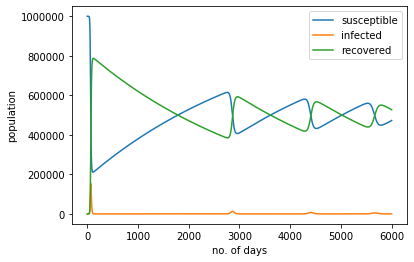

In [134]:
betta=0.4 # Daily infection rate
nu=0.2
sigma=1/(10*365)
def du_dt(u,t):
    lamda=betta*u[1]/1000000
    return([-u[0]*(lamda)+u[2]*sigma,u[0]*lamda - nu*u[1],u[1]*nu-u[2]*sigma])
x=np.linspace(0,6000,5999)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Case Study

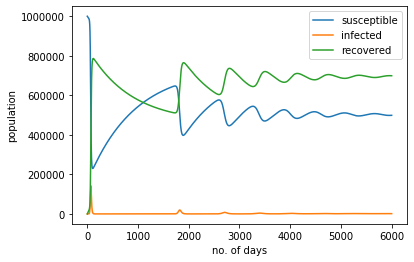

In [6]:
# A model to simulate a virus infected on animals in a closed environment, ie, no population movement
betta=0.4 # Daily infection rate
nu=0.2 # recovery rate 
sigma=1/(10*365) # wanning of immumity rate ie, the vaccine is effective for 10 years
mu=1/(3*365) # death rate ie, average lifespan of animal is 3 years
b=1/(3*365) # birth rate 
p=0.4 # proportion of births vaccinated
pop=999999+1 # population of animal
def du_dt(u,t):
    lamda=betta*u[1]/1000000
    return([-u[0]*(lamda)+u[2]*sigma+(1-p)*b*pop-mu*u[0],u[0]*lamda - nu*u[1]-mu*u[1],u[1]*nu-u[2]*sigma-mu*u[2]+(1-p)*b*pop])
x=np.linspace(0,6000,5999)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Modelling treatment

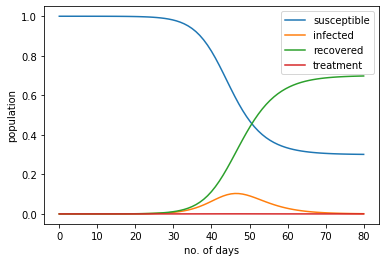

In [29]:
betta=0.6 # Daily infection rate
nu=0.2
pop=300000
t=5
h=0.15 
def du_dt(u,t):
    lamda=betta*(u[1]+u[3])/pop
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1] - h*u[1],u[1]*nu + t*u[3],h*u[1] - t*u[3] ])
x=np.linspace(0,80,79)
y0=[pop-1,1,0,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.plot(x,y[:,3]/pop,label="treatment")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

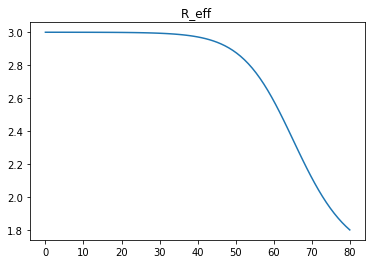

In [23]:
r0=betta/nu
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

In [31]:
import pandas as pd
df=pd.DataFrame(y[:,3])
df.describe()

,0
count,79.000000
mean,23.922163
std,32.315523
min,0.000000
25%,0.876065
50%,5.944402
75%,37.839800
max,101.019917


# A separate compartment for vaccination

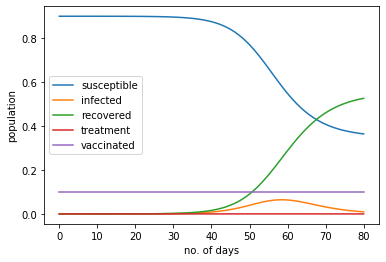

In [33]:
betta=0.6 # Daily infection rate
nu=0.2
pop=300000
t=5
h=0.15 
p=0.1
def du_dt(u,t):
    lamda=betta*(u[1]+u[3])/pop
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1] - h*u[1],u[1]*nu + t*u[3],h*u[1] - t*u[3] ,0])
x=np.linspace(0,80,79)
y0=[(pop-1)*(1-p),1,0,0,p*(pop-1)]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.plot(x,y[:,3]/pop,label="treatment")
plt.plot(x,y[:,4]/pop,label="vaccinated")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Modelling a leaky vaccine

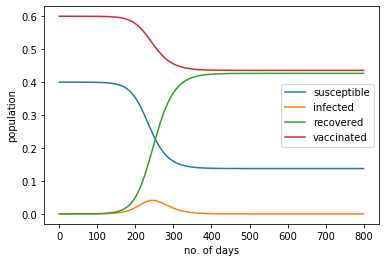

In [44]:
betta=0.25 # Daily infection rate
nu=0.1
pop=300000
c=0.3
p=0.6 # proportion of population vaccinated
def du_dt(u,t):
    lamda=betta*(u[1])/pop
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1]+ c*lamda*u[3] ,u[1]*nu,-c*lamda*u[3]])
x=np.linspace(0,800,799)
y0=[(1-p)*(pop-1),1,0,p*(pop-1)]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.plot(x,y[:,3]/pop,label="vaccinated")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

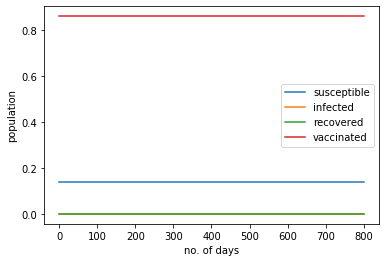

In [48]:
betta=0.25 # Daily infection rate
nu=0.1
pop=300000
c=0.3
p=0.86 # proportion of population vaccinated
def du_dt(u,t):
    lamda=betta*(u[1])/pop
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1]+ c*lamda*u[3] ,u[1]*nu,-c*lamda*u[3]])
x=np.linspace(0,800,799)
y0=[(1-p)*(pop-1),1,0,p*(pop-1)]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.plot(x,y[:,3]/pop,label="vaccinated")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Modelling additional vaccine effects

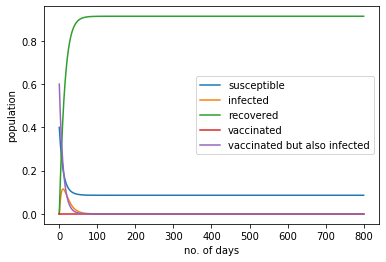

In [50]:
betta=0.25 # Daily infection rate
gamma=0.1
pop=300000
c_s=0.3
c_i=0.5
p=0.6 # proportion of population vaccinated
def du_dt(u,t):
    lamda=betta*(u[1])/pop + c_i*betta*u[4]/pop
    return([-u[0]*(lamda),u[0]*lamda - gamma*u[1] ,(u[4]+u[1])*gamma,-c_s*lamda*u[3],-c_s*lamda*u[3]-gamma*u[4]])
x=np.linspace(0,800,799)
y0=[(1-p)*(pop-1),1,0,0,p*(pop-1)]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.plot(x,y[:,3]/pop,label="vaccinated")
plt.plot(x,y[:,4]/pop,label="vaccinated but also infected")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Manual calibration of an SIR model

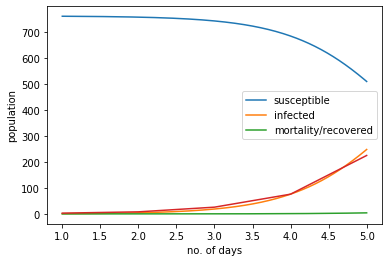

In [72]:
x_axis=[1,2,3,4,5]
y_axis=[3,8,26,76,225]
betta=1.5
nu=0.02
pop=762
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(1,5,500)
y0=[pop-1,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="mortality/recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.plot(x_axis,y_axis)
plt.show()


In [76]:
y_=[3,8,26,76,225,298,258,233,189,128,68,29,14,4]
x_=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]

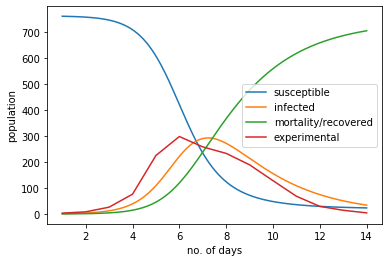

In [82]:
betta=1.7
nu=0.45
pop=762
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(1,14,500)
y0=[pop-1,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="mortality/recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.plot(x_,y_,label="experimental")
plt.legend()
plt.show()

In [99]:
def sqr_err(x,y):
    error=0
    for i in range(len(x)):
        error+=(x[i]-y[i])**2
    return(error)

# Curve fitting : finding gamma and lambda

In [88]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np


#% matplotlib inline

# DATA ------------------------------------------------------------------------
x_samp = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y_samp = np.array([3,8,26,76,225,298,258,233,189,128,68,29,14,4]) 

In [93]:
def func(x, betta, nu):
    pop=762
    def du_dt(u,t):
        lamda=betta*u[1]/pop
        return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
    x=np.linspace(1,14,14)
    y0=[pop-1,1,0]
    y=odeint(du_dt,y0,x)
    return y[:,1]

Estimated Parameters [1.96814953 0.47124392]


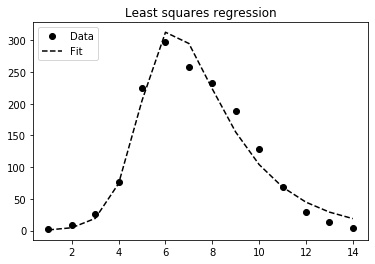

In [102]:
x_lin=np.linspace(1,14,14)
p0 = [1.15,0.02]                                        # guessed params
w,_ = opt.curve_fit(func, x_samp, y_samp, p0=p0)     
print("Estimated Parameters", w)  
y_model = func(x_lin, *w)
plt.plot(x_samp, y_samp, "ko", label="Data")
plt.plot(x_lin, y_model, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")
plt.show()

In [100]:
sqr_err(y_samp,y_model)

4551.153266075826

In [160]:
def f(x):
    y=[]
    for i in x:
        y.append(scipy.special.factorial(i))
    return(np.array(y))
def liklihood(y1,y2):
    return(np.sum(np.dot(y1,np.log(y1))-y1-np.dot(np.log(y2),y2)-y2))

In [161]:
liklihood(y_model,y_samp)

-3806.4044281012802

# Modelling a case study

## Situation:

A new respiratory virus has begun circulating in another country. So far, epidemiological investigations have yielded the data below. What is an estimate for the average infection rate (the ‘beta’ parameter) for this disease? If a vaccine with 80% effectiveness becomes available before an epidemic begins in your own country, what is the minimum coverage of this vaccine, in order to prevent an outbreak from occurring?

## Epidemiological data

* All infected individuals go through an incubation period, which lasts on average for 4 days. During this time, individuals are not infectious, nor do they have any excess mortality risk.  
* All infected individuals eventually develop symptoms, and the mean duration of symptoms before recovery or death is 5 days. Symptomatic individuals are infectious, as well as having a 3% case fatality rate. Those who survive the infection are thought to have long-term immunity.  
* In the source country, the peak prevalence (i.e. maximum number of symptomatic people during the epidemic) was observed to be 8% of the population.  
* Assume that the source country and your own country are epidemiologically equivalent (i.e. that disease transmission follows the same parameters in both settings).  

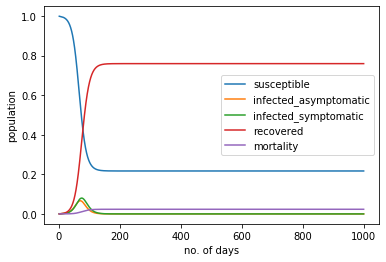

In [227]:
betta=0.39
nu=0.2
as_sy=0.25
p=0.97
pop=1000
def du_dt(u,t):
    lamda=betta*u[2]/pop
    return([-u[0]*(lamda),u[0]*lamda - as_sy*u[1],as_sy*u[1]-nu*u[2],nu*p*u[2],nu*(1-p)*u[2]])
x=np.linspace(1,1000,5000)
y0=[(pop-1),0,1,0,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected_asymptomatic")
plt.plot(x,y[:,2]/pop,label="infected_symptomatic")
plt.plot(x,y[:,3]/pop,label="recovered")
plt.plot(x,y[:,4]/pop,label="mortality")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

In [240]:
j=r0*y[:,0]/pop
j[0]

0.9974016

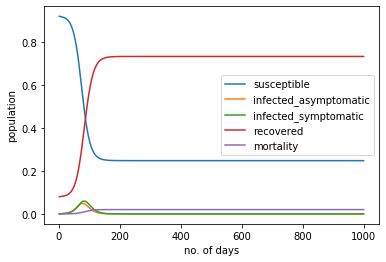

In [242]:
betta=0.39
nu=0.2
as_sy=0.25
p=0.97
pop=1000
p_v=0.1
v_eff=0.8
def du_dt(u,t):
    lamda=betta*u[2]/pop
    return([-u[0]*(lamda),u[0]*lamda - as_sy*u[1],as_sy*u[1]-nu*u[2],nu*p*u[2],nu*(1-p)*u[2]])
x=np.linspace(1,1000,5000)
y0=[(pop-1)*(1-v_eff*p_v),0,1,(pop-1)*(v_eff)*(p_v),0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected_asymptomatic")
plt.plot(x,y[:,2]/pop,label="infected_symptomatic")
plt.plot(x,y[:,3]/pop,label="recovered")
plt.plot(x,y[:,4]/pop,label="mortality")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

In [243]:
max(y[:,2]/pop)

0.05966408215228777

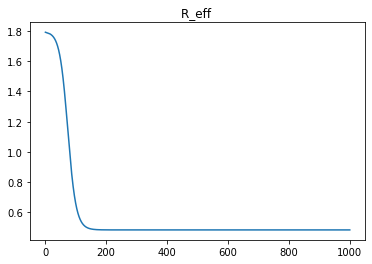

In [244]:
r0=betta/nu
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

In [245]:
r0

1.95

In [34]:
import numpy as np
import matplotlib.pyplot as plt
def ODE():
    # define model parameters
    t_0 = 0 
    t_end = 20
    length = 100000
    nu = 1.8
    betta = 0.3
    pop=1000
    # define time axis
    t = np.linspace(t_0,t_end,length) 
    dt = np.mean(np.diff(t))
    # initialize arrays for susceptible,infected and recovered
    s = np.zeros(length)
    inf = np.zeros(length)
    r = np.zeros(length)
    # initial condition
    s[0]=pop-1
    inf[0]=1.0
    r[0]=0.0
    # defining differential equation for each variable
    susceptible = lambda s_: -betta*s_
    infected = lambda s_,i_: betta*s_ - nu*i_
    recovered = lambda i_:nu*i_
    # solve SDE
    for i in np.arange(1,length):
        s[i] = s[i-1] + susceptible(s[i-1])*dt
        inf[i] = inf[i-1] + infected(s[i-1],inf[i-1])*dt
        r[i] = r[i-1] + recovered(inf[i-1])*dt
    return(s,inf,r)

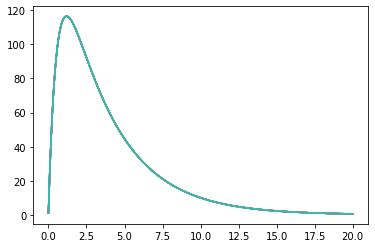

In [35]:
for j in range(10):
    s,i,r=ODE()
    #plt.plot(t,s,label="susceptible")
    plt.plot(t,i,label="infected")
    #plt.plot(t,r,label="recovered")
    #plt.legend()
plt.show()

# Stochastic simulations of a novel pathogen

In [44]:
import math
import random
def SSA_SIR(_alpha,_beta):
    # Input parameters ####################
    # int; total population
    N = 350
    # float; maximum elapsed time
    T = 100.0
    # float; start time
    t = 0.0

    # float; spatial parameter
    V = 100.0

    # float; rate of infection after contact
    _alpha = 10.0

    # float; rate of cure
    _beta = 0.5

    # int; initial infected population
    n_I = 1

    #########################################

    # Compute susceptible population, set recovered to zero
    n_S = N - n_I
    n_R = 0

    # Initialize results list
    SIR_data = []
    SIR_data.append((t, n_S, n_I, n_R))

    # Main loop
    while t < T:
        if n_I == 0:
            break

        w1 = _alpha * n_S * n_I / V
        w2 = _beta * n_I
        W = w1 + w2

        dt = -math.log(random.uniform(0.0, 1.0)) / W
        t = t + dt

        if random.uniform(0.0, 1.0) < w1 / W:
            n_S = n_S - 1
            n_I = n_I + 1
        else:
            n_I = n_I - 1
            n_R = n_R + 1

        SIR_data.append((t, n_S, n_I, n_R))
    return(SIR_data)

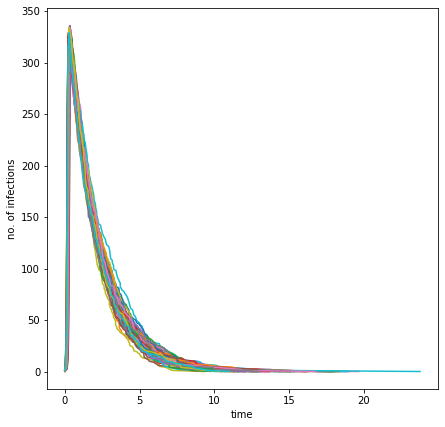

In [87]:
plt.figure(figsize=(7,7))
for j in range(100):
    data=SSA_SIR(0.39,0.4)
    data=np.array(data)
    plt.plot(data[:,0],data[:,2])
plt.xlabel("time")
plt.ylabel("no. of infections")
plt.show()

# Developing an age-structured model

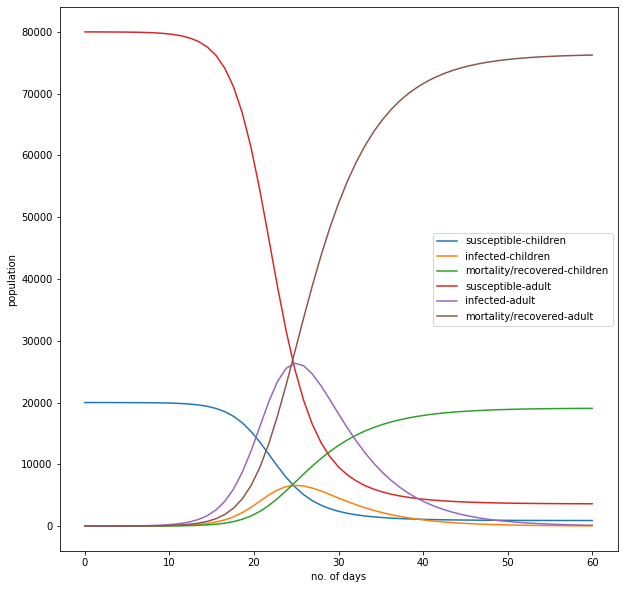

In [97]:
b=5/100
nu=0.2
c11=7
c12=6
c22=10
c21=1
pop=100000
n2=0.8*pop
n1=0.2*pop
def du_dt(u,t):
    lamda1=b*c12*u[4]/n2+b*c11*u[1]/n1 # lambda for children 
    lamda2=b*c22*u[4]/n2+b*c21*u[1]/n1 # lambda for adults
    return([-u[0]*(lamda1),u[0]*lamda1 - nu*u[1],u[1]*nu,-u[3]*(lamda1),u[3]*lamda1 - nu*u[4],u[4]*nu])
x=np.linspace(0,60,59)
y0=[n1,1,0,n2,1,0]
y=odeint(du_dt,y0,x)
plt.figure(figsize=(10,10))
plt.plot(x,y[:,0],label="susceptible-children")
plt.plot(x,y[:,1],label="infected-children")
plt.plot(x,y[:,2],label="mortality/recovered-children")
plt.plot(x,y[:,3],label="susceptible-adult")
plt.plot(x,y[:,4],label="infected-adult")
plt.plot(x,y[:,5],label="mortality/recovered-adult")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend(prop={"size":10})
plt.show()

# Extending the model to 3 age groups

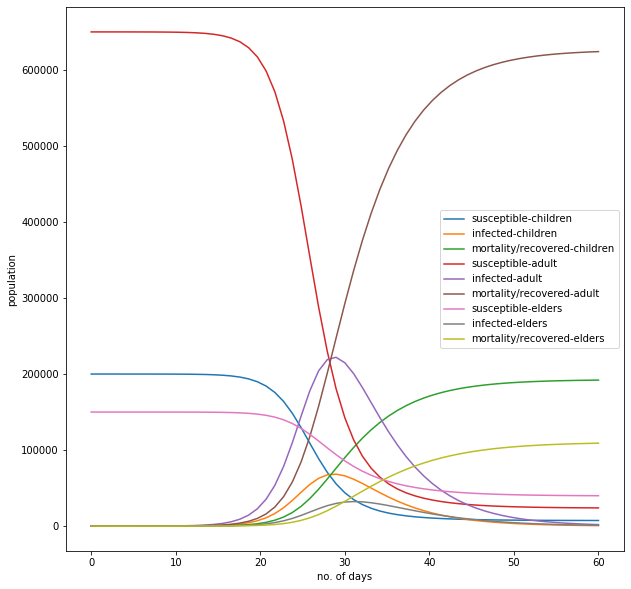

In [96]:
b=5/100
nu=0.2
c11=7
c12=6
c22=10
c21=1
c13=1
c23=1
c33=2
c32=3
c31=1
pop=1000000
n2=0.65*pop
n1=0.20*pop
n3=0.15*pop
def du_dt(u,t):
    lamda1=b*c12*u[4]/n2+b*c11*u[1]/n1+b*c13*u[7]/n3 # lambda for children 
    lamda2=b*c22*u[4]/n2+b*c21*u[1]/n1+b*c23*u[7]/n3 # lambda for adults
    lamda3=b*c32*u[4]/n2+b*c31*u[1]/n1+b*c33*u[7]/n3 # lambda for elders
    return([-u[0]*(lamda1),u[0]*lamda1 - nu*u[1],u[1]*nu,-u[3]*(lamda1),u[3]*lamda1 - nu*u[4],u[4]*nu,-u[6]*(lamda3),u[6]*lamda3 - nu*u[7],u[7]*nu])
x=np.linspace(0,60,59)
y0=[n1,1,0,n2,1,0,n3,1,0]
y=odeint(du_dt,y0,x)
plt.figure(figsize=(10,10))
plt.plot(x,y[:,0],label="susceptible-children")
plt.plot(x,y[:,1],label="infected-children")
plt.plot(x,y[:,2],label="mortality/recovered-children")
plt.plot(x,y[:,3],label="susceptible-adult")
plt.plot(x,y[:,4],label="infected-adult")
plt.plot(x,y[:,5],label="mortality/recovered-adult")
plt.plot(x,y[:,6],label="susceptible-elders")
plt.plot(x,y[:,7],label="infected-elders")
plt.plot(x,y[:,8],label="mortality/recovered-elders")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend(prop={"size":10})
plt.show()

# Interventions in an age-structured population

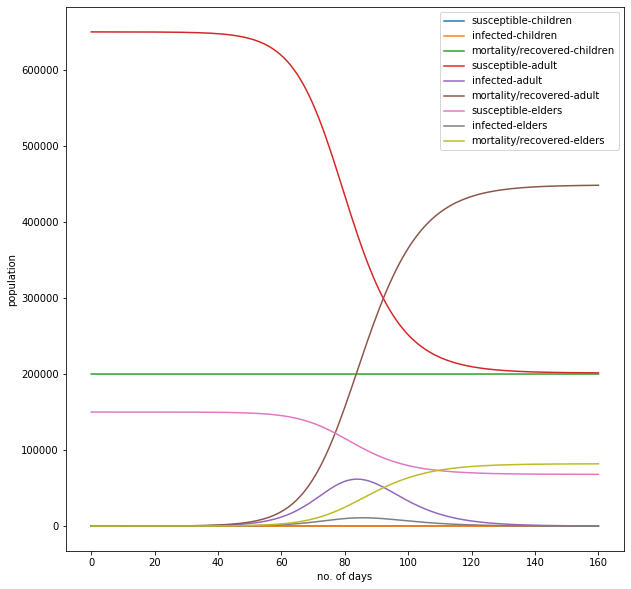

In [99]:
b=5/100
nu=0.2
c11=7
c12=6
c22=10
c21=1
c13=1
c23=1
c33=2
c32=3
c31=1
vc1=1
vc2=0
vc3=0
ev3=0.5
pop=1000000
n2=0.65*pop
n1=0.20*pop
n3=0.15*pop
def du_dt(u,t):
    lamda1=b*c12*u[4]/n2+b*c11*u[1]/n1+b*c13*u[7]/n3 # lambda for children 
    lamda2=b*c22*u[4]/n2+b*c21*u[1]/n1+b*c23*u[7]/n3 # lambda for adults
    lamda3=b*c32*u[4]/n2+b*c31*u[1]/n1+b*c33*u[7]/n3 # lambda for elders
    return([-u[0]*(lamda1),u[0]*lamda1 - nu*u[1],u[1]*nu,-u[3]*(lamda1),u[3]*lamda1 - nu*u[4],u[4]*nu,-u[6]*(lamda3),u[6]*lamda3 - nu*u[7],u[7]*nu])
x=np.linspace(0,160,159)
y0=[n1-vc1*n1,1,vc1*n1,n2-vc2*n2,1,vc2*n2,n3-n3*vc3*ev3,1,n3*vc3*ev3]
y=odeint(du_dt,y0,x)
plt.figure(figsize=(10,10))
plt.plot(x,y[:,0],label="susceptible-children")
plt.plot(x,y[:,1],label="infected-children")
plt.plot(x,y[:,2],label="mortality/recovered-children")
plt.plot(x,y[:,3],label="susceptible-adult")
plt.plot(x,y[:,4],label="infected-adult")
plt.plot(x,y[:,5],label="mortality/recovered-adult")
plt.plot(x,y[:,6],label="susceptible-elders")
plt.plot(x,y[:,7],label="infected-elders")
plt.plot(x,y[:,8],label="mortality/recovered-elders")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend(prop={"size":10})
plt.show()

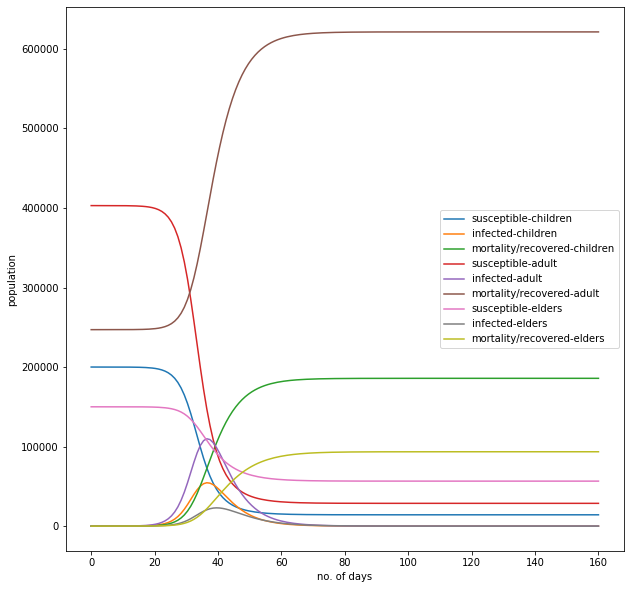

In [100]:
b=5/100
nu=0.2
c11=7
c12=6
c22=10
c21=1
c13=1
c23=1
c33=2
c32=3
c31=1
vc1=0
vc2=0.38
vc3=0
ev3=0.5
pop=1000000
n2=0.65*pop
n1=0.20*pop
n3=0.15*pop
def du_dt(u,t):
    lamda1=b*c12*u[4]/n2+b*c11*u[1]/n1+b*c13*u[7]/n3 # lambda for children 
    lamda2=b*c22*u[4]/n2+b*c21*u[1]/n1+b*c23*u[7]/n3 # lambda for adults
    lamda3=b*c32*u[4]/n2+b*c31*u[1]/n1+b*c33*u[7]/n3 # lambda for elders
    return([-u[0]*(lamda1),u[0]*lamda1 - nu*u[1],u[1]*nu,-u[3]*(lamda1),u[3]*lamda1 - nu*u[4],u[4]*nu,-u[6]*(lamda3),u[6]*lamda3 - nu*u[7],u[7]*nu])
x=np.linspace(0,160,159)
y0=[n1-vc1*n1,1,vc1*n1,n2-vc2*n2,1,vc2*n2,n3-n3*vc3*ev3,1,n3*vc3*ev3]
y=odeint(du_dt,y0,x)
plt.figure(figsize=(10,10))
plt.plot(x,y[:,0],label="susceptible-children")
plt.plot(x,y[:,1],label="infected-children")
plt.plot(x,y[:,2],label="mortality/recovered-children")
plt.plot(x,y[:,3],label="susceptible-adult")
plt.plot(x,y[:,4],label="infected-adult")
plt.plot(x,y[:,5],label="mortality/recovered-adult")
plt.plot(x,y[:,6],label="susceptible-elders")
plt.plot(x,y[:,7],label="infected-elders")
plt.plot(x,y[:,8],label="mortality/recovered-elders")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend(prop={"size":10})
plt.show()

# A vector-borne disease (VBD) model

The differential equations for the mosquito population dynamics are:

\begin{align}
\frac{dS_V}{dt} &= \mu_V N_V - \frac{a b_V}{N_H} S_V I_H - \mu_V S_V \\
\frac{dI_V}{dt} &= \frac{a b_V}{N_H} S_V I_H - \mu_V I_V
\end{align}

The differential equations for the human host population dynamics are:

\begin{align}
\frac{dS_H}{dt} &= - \frac{a b_H}{N_H} S_H I_V \\
\frac{dI_H}{dt} &= \frac{a b_H}{N_H} S_H I_V - r I_H \\
\frac{dR_H}{dt} &= r I_H
\end{align}

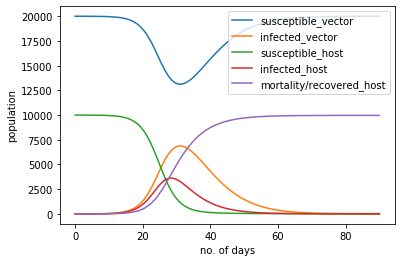

In [106]:
a=1 # biting rate
bv=0.4 # Probability of infection from an infected host to a susceptible vector
bh=0.4 # Probability of infection from an infected vector to a susceptible host
nuv=0.25 # Mortality rate of the vector
r=0.167 # Recovery rate of the host
nv=20000  # total no. of vectors
nh=10000   # total number of hosts
def du_dt(u,t):
    return([nuv*nv-u[3]*a*bv*u[0]/nh-nuv*u[0],a*bv*u[0]*u[3]/nh-nuv*u[1],-a*bh*u[2]*u[1]/nh,a*bh*u[2]*u[1]/nh-r*u[3],r*u[3]])
x=np.linspace(0,90,89)
y0=[nv,1,nh,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible_vector")
plt.plot(x,y[:,1],label="infected_vector")
plt.plot(x,y[:,2],label="susceptible_host")
plt.plot(x,y[:,3],label="infected_host")
plt.plot(x,y[:,4],label="mortality/recovered_host")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

## Sensitivity of infection prevalence to the biting rate

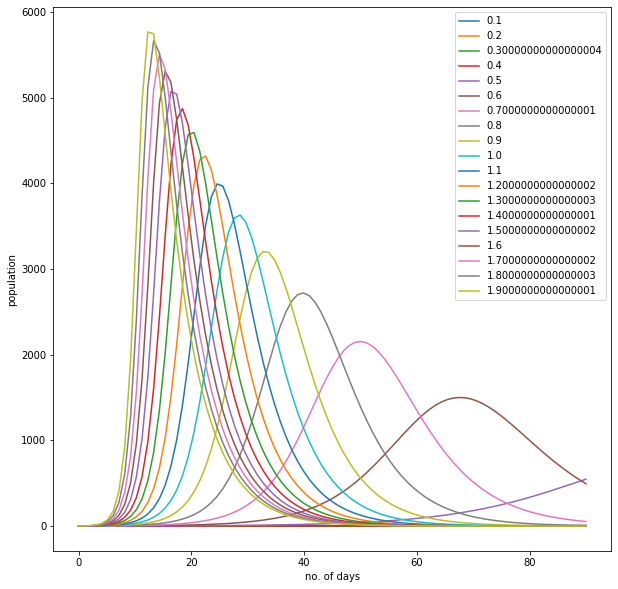

In [108]:
plt.figure(figsize=(10,10))
def f(a):
    #a=1 # biting rate
    bv=0.4 # Probability of infection from an infected host to a susceptible vector
    bh=0.4 # Probability of infection from an infected vector to a susceptible host
    nuv=0.25 # Mortality rate of the vector
    r=0.167 # Recovery rate of the host
    nv=20000  # total no. of vectors
    nh=10000   # total number of hosts
    def du_dt(u,t):
        return([nuv*nv-u[3]*a*bv*u[0]/nh-nuv*u[0],a*bv*u[0]*u[3]/nh-nuv*u[1],-a*bh*u[2]*u[1]/nh,a*bh*u[2]*u[1]/nh-r*u[3],r*u[3]])
    x=np.linspace(0,90,89)
    y0=[nv,1,nh,1,0]
    y=odeint(du_dt,y0,x)
    #plt.plot(x,y[:,0],label="susceptible_vector")
    #plt.plot(x,y[:,1],label="infected_vector")
    #plt.plot(x,y[:,2],label="susceptible_host")
    #plt.plot(x,y[:,3],label="infected_host")
    #plt.plot(x,y[:,4],label="mortality/recovered_host")
    return(x,y[:,3])
for i in np.arange(0.1,2.0,0.1):
    x,y=f(i)
    plt.plot(x,y,label=i)
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Coding vector control interventions

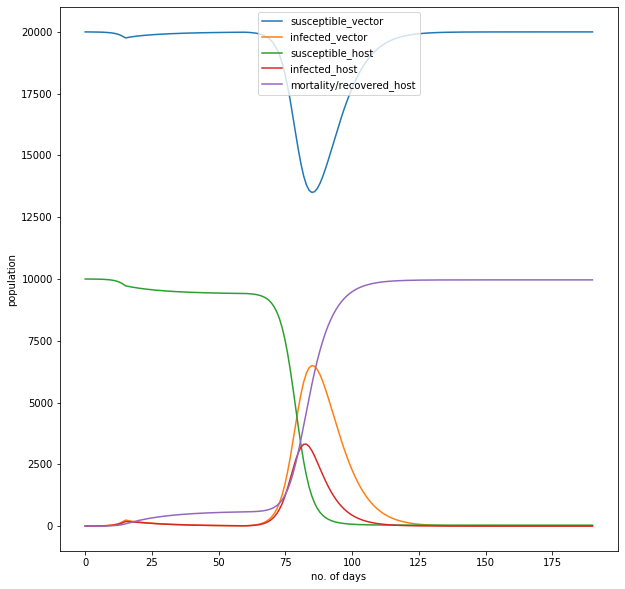

In [120]:
a=1 # biting rate
bv=0.4 # Probability of infection from an infected host to a susceptible vector
bh=0.4 # Probability of infection from an infected vector to a susceptible host
nuv=0.25 # Mortality rate of the vector
r=0.167 # Recovery rate of the host
nv=20000  # total no. of vectors
nh=10000   # total number of hosts
def du_dt(u,t):
    if (t<= 15):
         a = 1
    elif (t > 15 and t <= 60):
        a = 0.25
    elif (t > 60): 
        a = 1
    return([nuv*nv-u[3]*a*bv*u[0]/nh-nuv*u[0],a*bv*u[0]*u[3]/nh-nuv*u[1],-a*bh*u[2]*u[1]/nh,a*bh*u[2]*u[1]/nh-r*u[3],r*u[3]])
x=np.linspace(0,190,189)
y0=[nv,1,nh,1,0]
y=odeint(du_dt,y0,x)
plt.figure(figsize=(10,10))
plt.plot(x,y[:,0],label="susceptible_vector")
plt.plot(x,y[:,1],label="infected_vector")
plt.plot(x,y[:,2],label="susceptible_host")
plt.plot(x,y[:,3],label="infected_host")
plt.plot(x,y[:,4],label="mortality/recovered_host")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()